# Making Waffle Chart

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Defining custom dataframe

In [ ]:
df_medals = pd.DataFrame({
    "state":['Maharashtra','Kerala','Goa','Odisha'],
    "medals":[812,334,120,130]
})

In [ ]:
df_medals

,state,medals
0,Maharashtra,812
1,Kerala,334
2,Goa,120
3,Odisha,130


In [ ]:
total_medals = sum(df_medals['medals'])
total_medals

1396

In [ ]:
#proportion
proportions = [(float(value)/total_medals) for value in df_medals['medals'] ]
proportions

[0.5816618911174785,
 0.23925501432664756,
 0.08595988538681948,
 0.09312320916905444]

In [ ]:
width=40
height=10
total = width * height

In [ ]:
tiles_per_category = [ round(proportion * total) for proportion in proportions]
tiles_per_category

[233, 96, 34, 37]

### making Custom Waffle Chart

In [ ]:
#make waffle chart
waffle = np.zeros((height, width))
category_index = 0
tile_index = 0

for col in range(width):
  for row in range(height):
    tile_index += 1
    if tile_index > sum(tiles_per_category[0:category_index]):
      category_index += 1
    waffle[row, col] = category_index

<Figure size 432x288 with 0 Axes>

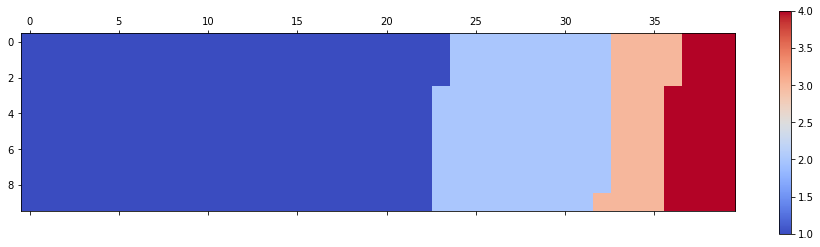

In [ ]:
fig = plt.figure()
cmap = plt.cm.coolwarm
plt.matshow(waffle , cmap = cmap)
plt.colorbar()

### Adding Legends

<Figure size 864x720 with 0 Axes>

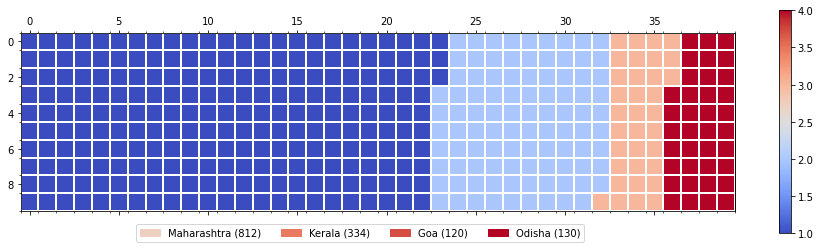

In [ ]:
plt.figure(figsize=(12,10))
colormap = plt.cm.coolwarm
plt.matshow(waffle , cmap = colormap)
ax = plt.gca()
ax.set_xticks(np.arange(-0.5,(width), 1), minor=True)
ax.set_yticks(np.arange(-0.5,(height),1), minor = True)
ax.grid(which='minor', color='w', linestyle ='-', linewidth=2)
plt.xticks=([])
plt.yticks=([])
plt.colorbar()

# adding legends
values = df_medals['medals']
categories = df_medals['state']

value_sign = ''
values_cumsum = np.cumsum(values)

total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = []
for i, category in enumerate(categories):

  label_str = category + ' (' + value_sign + str(values[i]) + ')'

  color_val = colormap((values_cumsum[i]) / total_values)
  
  legend_handles.append(mpatches.Patch( label=label_str, color = color_val))#color=color_val,
    
plt.legend(handles=legend_handles, loc = 'lower center', ncol=len(categories),
          bbox_to_anchor=(0.0, -0.2, 0.95, 0.1)) #positioning legends


# Develop Waffle Chart Using Waffle Class

### Installing the Waffle Class

In [ ]:
!pip install pywaffle

### importing Library

In [ ]:
from pywaffle import Waffle

### Making the Waffle Chart

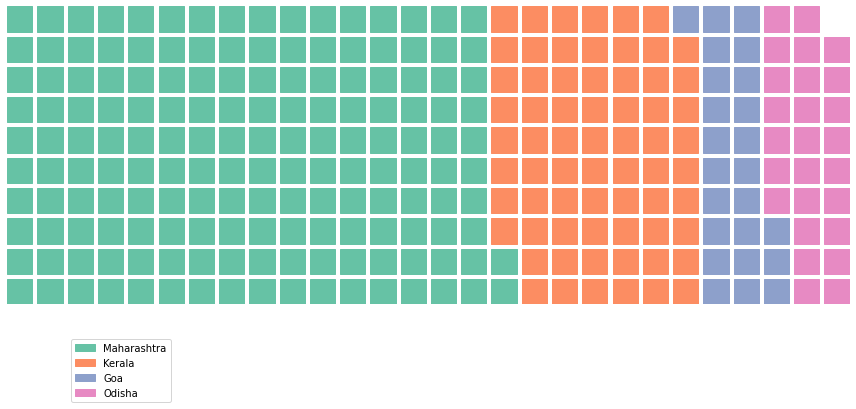

In [ ]:
# making Waffle chart for Custom Dataset Above
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(df_medals.medals/5),
    labels=list(df_medals.state),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.2, -0.1)}    
)

## Waffle chart on Women in Defence

In [ ]:
women_data = pd.read_csv('/content/WomenInDefense.csv')

In [ ]:
women_data.shape

(3, 5)

In [ ]:
women_data.head()

,Year,Army,Navy,Air Force,"Army Medical Corps, Dental Corps & Military Nursing Service (Common for three forces)"
0,2016,69,44,108,395
1,2017,66,42,59,884
2,2018,75,29,59,713


In [ ]:
#renaming the column
women_data.rename(columns={'Army Medical Corps, Dental Corps & Military Nursing Service (Common for three forces)':'Others'}, inplace=True)

In [ ]:
# adding a total column
women_data['Total'] = women_data.iloc[:,1:].sum(axis=1)

In [ ]:
women_data.head()

,Year,Army,Navy,Air Force,Others,Total
0,2016,69,44,108,395,616
1,2017,66,42,59,884,1051
2,2018,75,29,59,713,876


In [ ]:
#scaling Others and Total columns
women_data[['Others','Total']] = women_data[['Others', 'Total']]/20

Army *********************


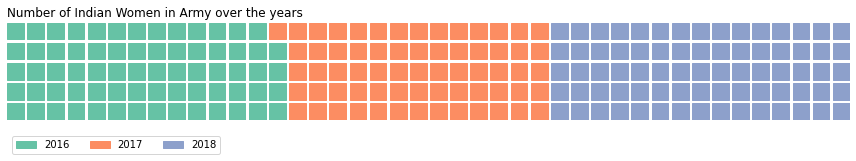

Navy *********************


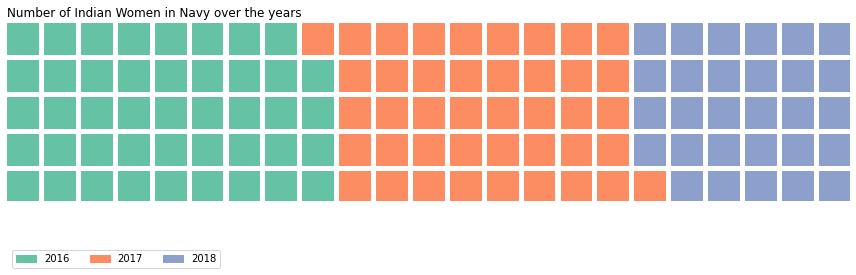

Air Force *********************


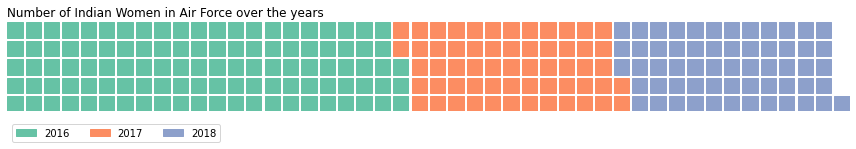

Others *********************


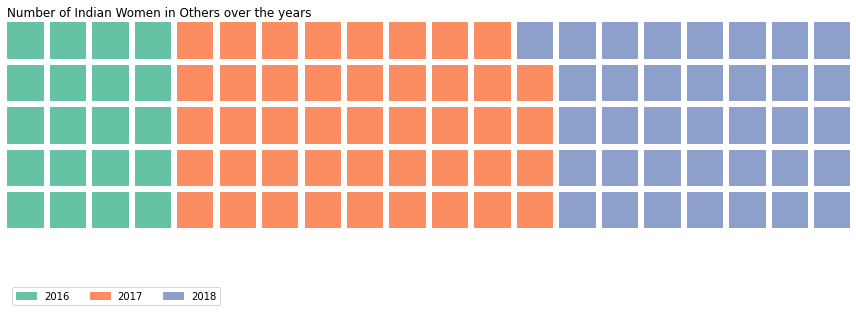

Total *********************


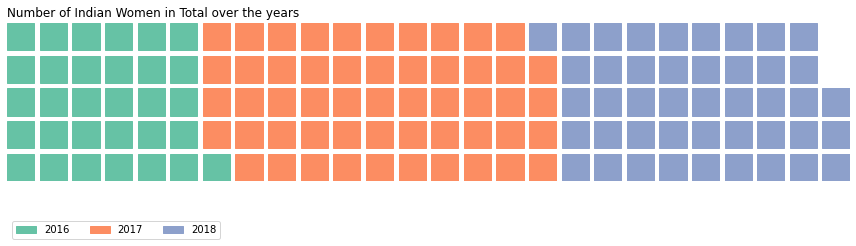

In [ ]:
for column in women_data.columns.drop('Year'):

  #plotting waffle chart for each of the column one by one
  
  fig2 = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      values=list(women_data[column]),
      labels=list(women_data.Year),
      figsize=(12, 8),
      legend={
          'loc':'lower left',
          'bbox_to_anchor':(0,-0.4),
          'ncol':len(women_data)
          } ,
      title={
          'label':f'Number of Indian Women in {column} over the years',
          'loc':'left'
      }
      )
  plt.show()

## Waffle Chart on representation in Lok Sabha of India

In [ ]:
lok_sabha_df = pd.read_excel('/content/Lok_sabha_data.xlsx')
lok_sabha_df.shape

(37, 4)

In [ ]:
lok_sabha_df.head()

,Sl. No.,Party Name,No. of Members,Percentage (%)
0,1,Bharatiya Janata Party(BJP),301,55.54
1,2,Indian National Congress(INC),53,9.78
2,3,Dravida Munnetra Kazhagam(DMK),24,4.43
3,4,Yuvajana Sramika Rythu Congress Party(YSR Cong...,22,4.06
4,5,All India Trinamool Congress(AITC),22,4.06


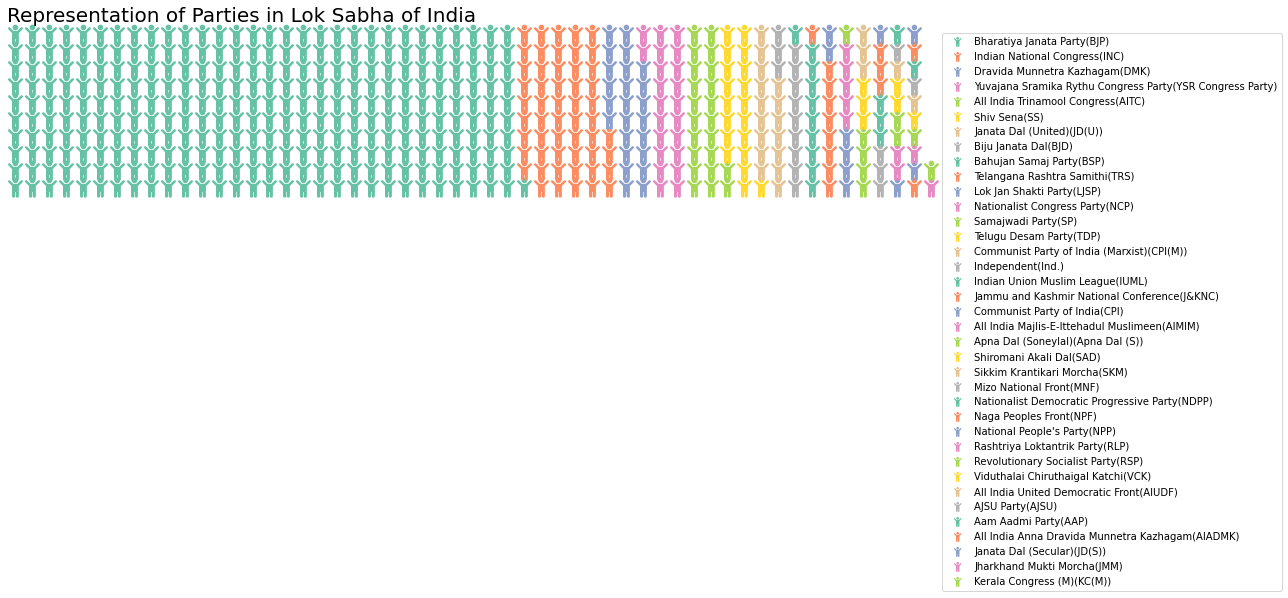

In [ ]:
fig = plt.figure(
    FigureClass = Waffle,
    rows=10,
    values = lok_sabha_df['No. of Members'],
    labels= list(lok_sabha_df['Party Name']),
    legend = {'loc':'upper left','bbox_to_anchor':(1,1)},
    icons='child',
    font_size = 20,
    figsize=(18,40),
    icon_legend= True,
    title={
        'label': 'Representation of Parties in Lok Sabha of India',
        'loc': 'left',
        'fontdict': {
            'fontsize': 20
        }}
)

plt.show()

##Waffle Chart on representation in Rajya Sabha of India

In [ ]:
rajya_sabha_df = pd.read_excel('/content/rajya_sabha_data.xlsx')
rajya_sabha_df.shape

(35, 3)

In [ ]:
rajya_sabha_df.head()

,Sno,Party,Strength
0,1,Aam Aadmi Party (AAP ),3
1,2,All India Anna Dravida Munnetra Kazhagam (AIAD...,5
2,3,All India Trinamool Congress (AITC ),13
3,4,Asom Gana Parishad (AGP ),1
4,5,Bahujan Samaj Party (BSP ),3


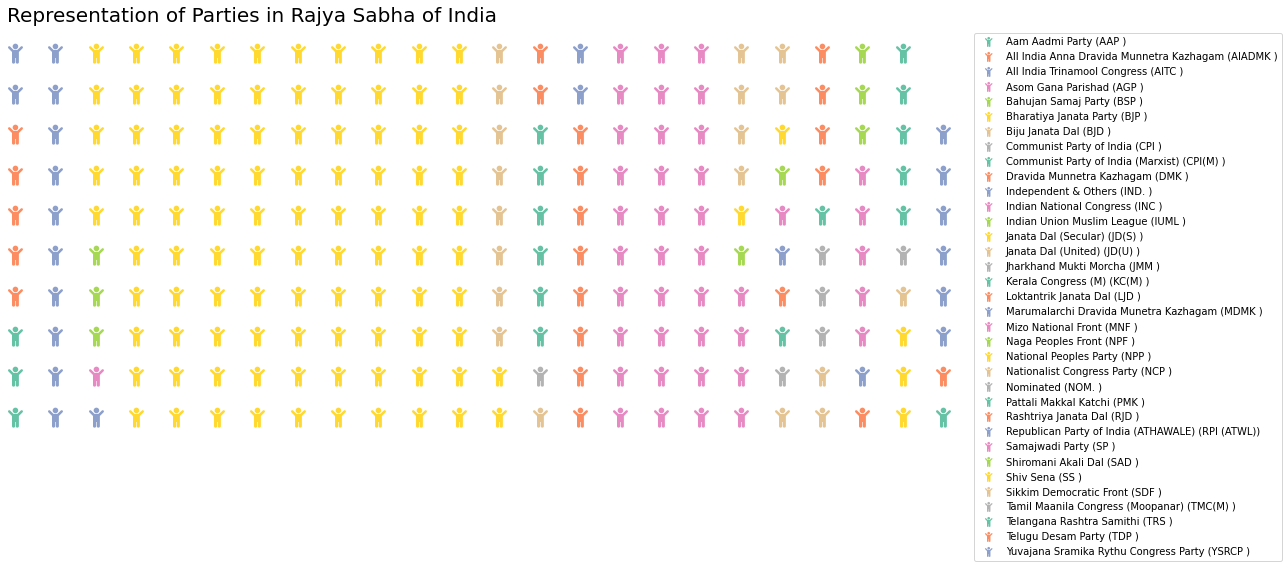

In [ ]:
fig = plt.figure(
    FigureClass = Waffle,
    rows=10,
    values = rajya_sabha_df['Strength'],
    labels= list(rajya_sabha_df['Party']),
    legend = {'loc':'upper left','bbox_to_anchor':(1,1)},
    icons='child',
    font_size = 20,
    figsize=(18,24),
    icon_legend= True,
    title={
        'label': 'Representation of Parties in Rajya Sabha of India',
        'loc': 'left',
        'fontdict': {
            'fontsize': 20
        }}
)

plt.show()